# Visualizing Complex-valued Functions

Math 347

February 26, 2018

In [2]:
import numpy as np
from matplotlib import pyplot as plt, rcParams, colors

%matplotlib inline
rcParams["figure.figsize"] = (16,8)

# Problem 1
def plot_complex(f, window=[-1, 1, -1, 1], res=400, title=""):
    """Visualizes the complex-valued function f : C -> C on a (res x res) domain.

    Mathematically, the domain is defined as `{a + bi | a in [r_min, r_max], b in [i_min, i_max]}`,
    where `r_min`, `r_max`, `i_min`, and `i_max` are given by the `window`, as defined below.

    This function visualizes the function `f` by plotting the argument of `f(z)` and the
    magnitude of `f(z)` in separate subplots for all `z` in the (res x res) domain.

    The argument of a complex number is defined as its angle in radians. For example,
    the argument of `1 + 1i` is `π/4`.
    
    Parameters:
        f (func): A function that accepts and returns arrays with complex entries.
        window ([r_min, r_max, i_min, i_max]): The real and imaginary domain bounds.
        res (int): The plot resolution. The domain will be (res x res) in size.
        title (str): A label for the function to set as the figure title.
            Use r"$<latex code>$" for pretty printing. For example, for the function
            `f = lambda z: z**2 - np.sqrt(z)`, use title=r"$f(z) = z^2 - \sqrt{z}$".
    """
    r_min, r_max, i_min, i_max = window
    X, Y = np.meshgrid(np.linspace(r_min, r_max, res), np.linspace(i_min, i_max, res))
    Z = X + 1j*Y
    
    # Plot argument of f(z) on first subplot
    fig, ax = plt.subplots(1,2)
    ax[0].pcolormesh(np.angle(f(Z)), vmin=-np.pi, vmax=np.pi, cmap="hsv")
    ax[0].set_title(r"arg(f(z))")
    ax[0].axis('off')
    ax[0].set_aspect("equal")
    
    # Plot magnitude of f(z) on second subplot
    ax[1].pcolormesh(np.abs(f(Z)), norm=colors.LogNorm(), cmap="viridis")
    ax[1].set_title(r"$|f(z)|$")
    ax[1].axis('off')
    ax[1].set_aspect("equal")
    
    fig.suptitle(title)
    plt.show()

## Plotting Functions

Let's start by plotting $f(z) = z$ on $\{x + yi \mid x,y \in [-1,1]\}$ and $f(z) = \sqrt{z^2 + 1}$ on $\{x + iy \mid x,y \in [-3,3]\}$.

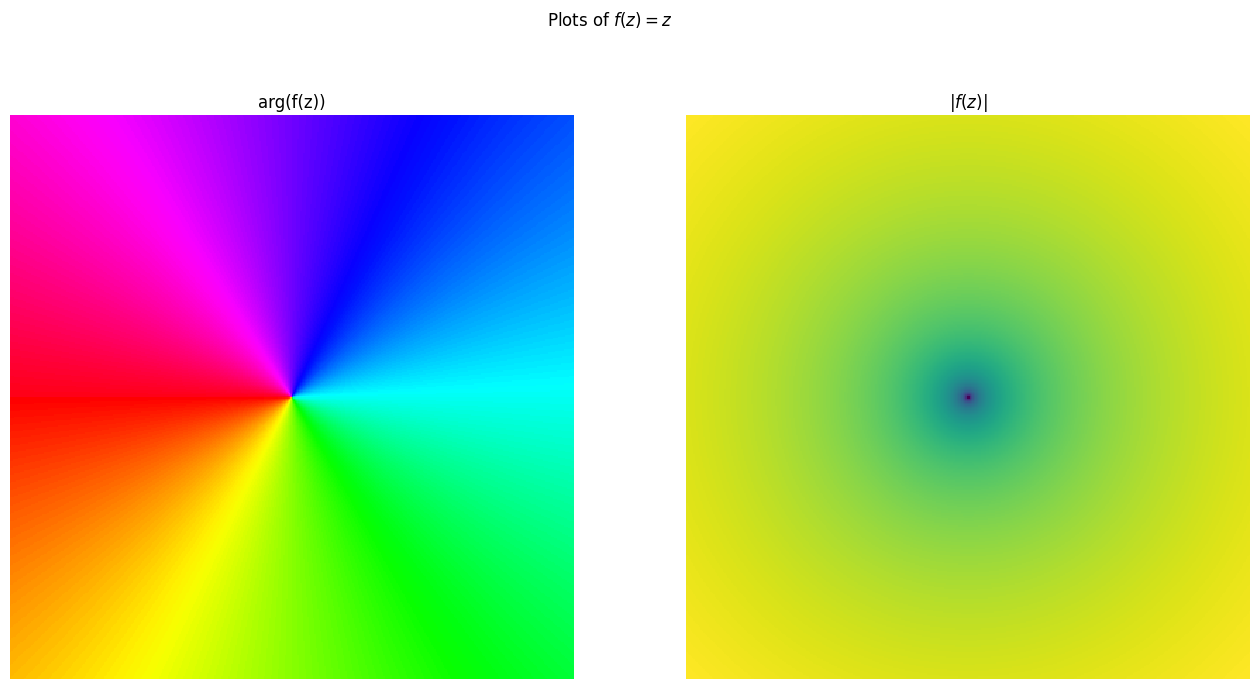

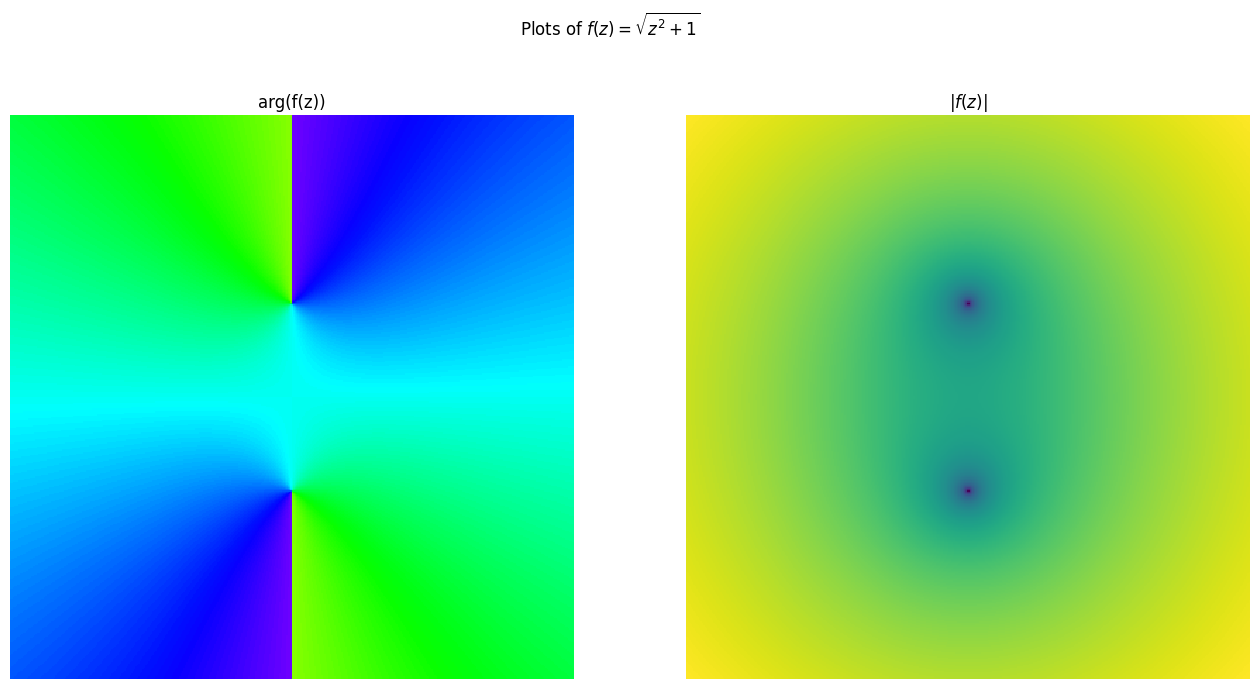

In [3]:
f = lambda z: z
plot_complex(f, title=r"Plots of $f(z) = z$")

f = lambda z: np.sqrt(z**2 + 1)
plot_complex(f, window=[-3, 3, -3, 3], title=r"Plots of $f(z) = \sqrt{z^2 + 1}$")

You can clearly see the roots of the functions on the magnitude plots above. The first function $f(z) = z$ has a root at $0$ and $f(z) = z^2 + 1$ has two roots at $i$ and $-i$.

Now let's plot the following functions on $\{x+iy \mid x \in [-1,1],\; y \in [-1,1]\}$.

- $f(z) = z^n$ for $n=2,3,4$.
- $f(z) = z^3 - iz^4 - 3z^6$.

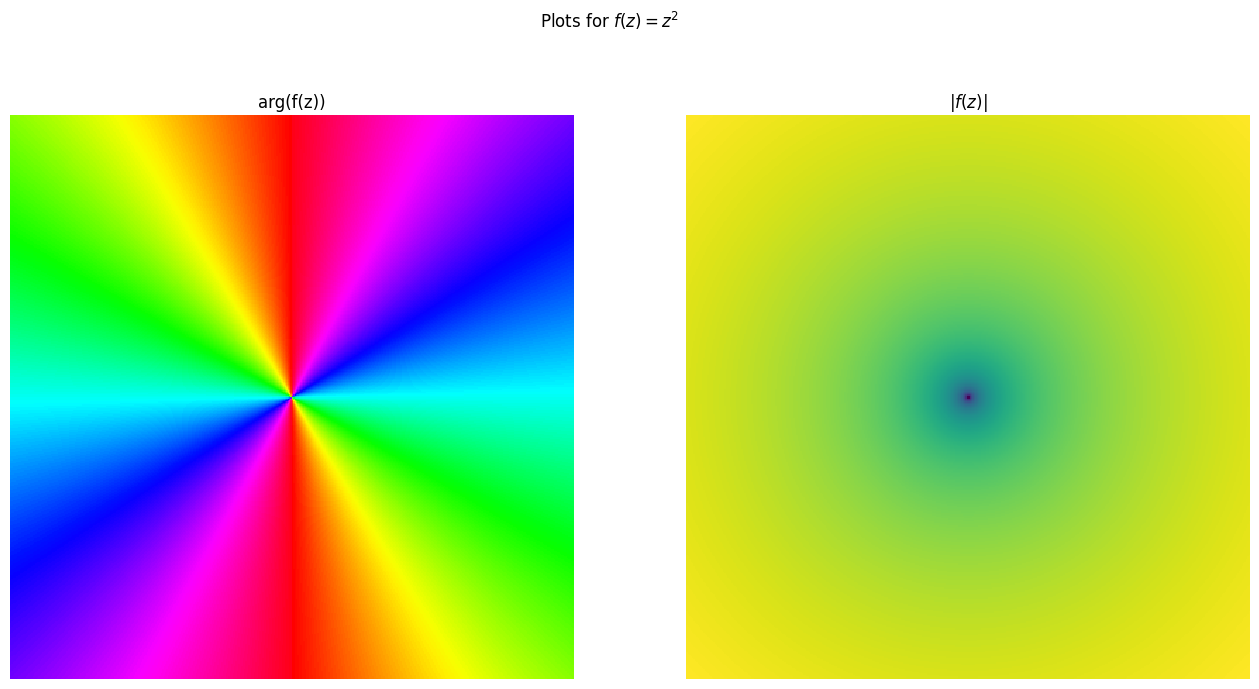

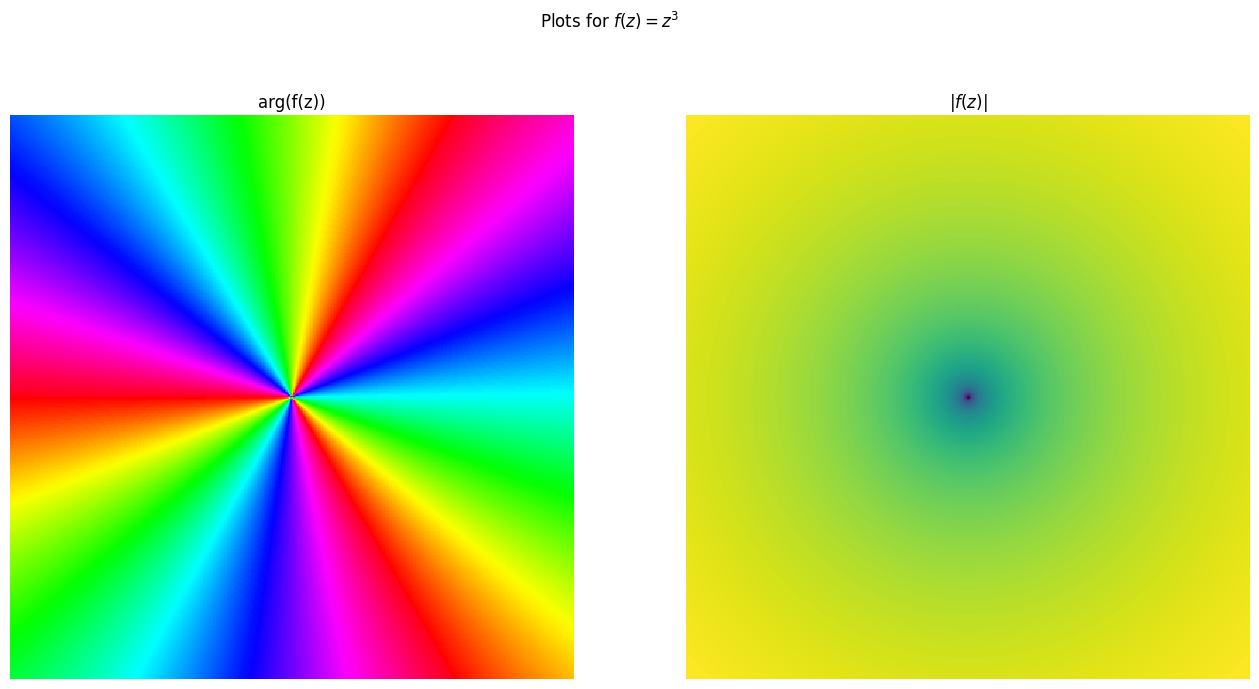

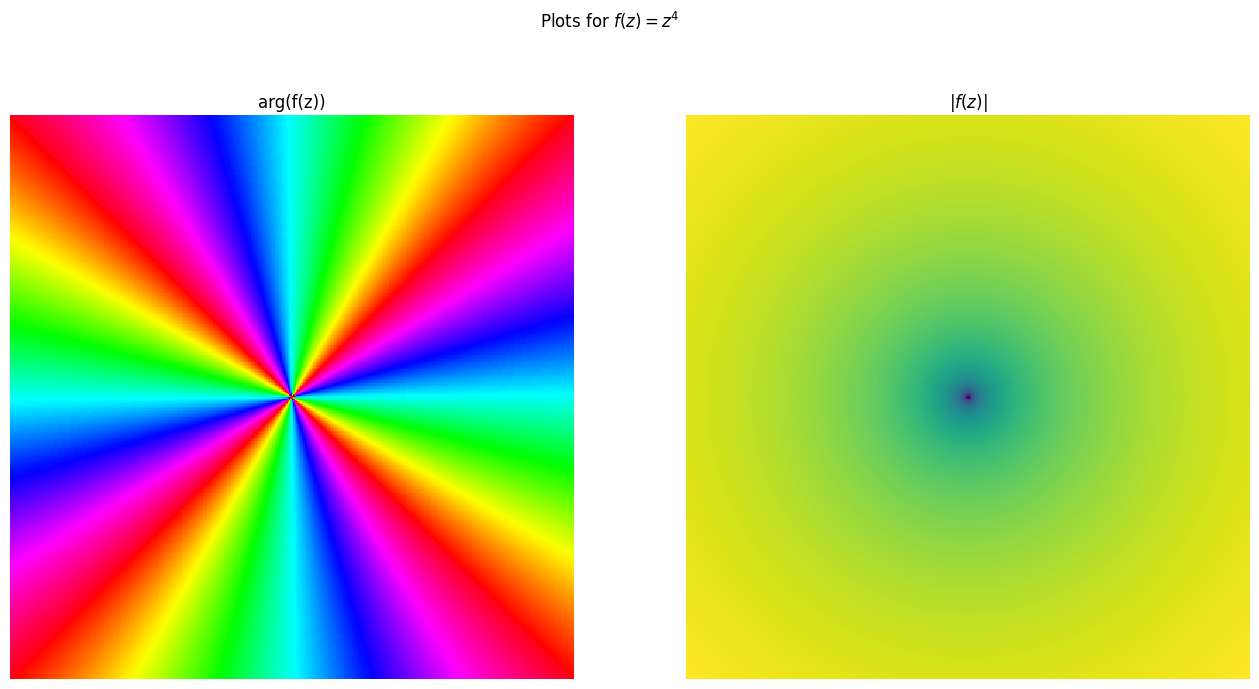

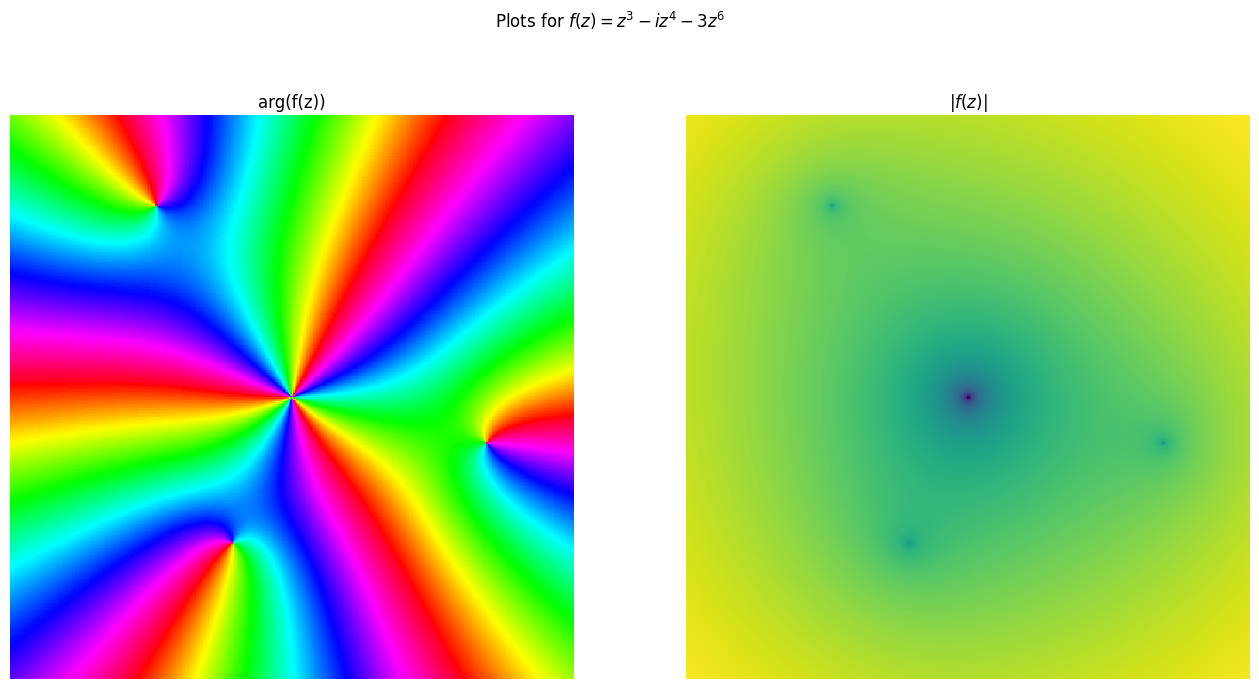

In [4]:
f = lambda z: z**2
plot_complex(f, title=r"Plots for $f(z) = z^2$")
f = lambda z: z**3
plot_complex(f, title=r"Plots for $f(z) = z^3$")
f = lambda z: z**4
plot_complex(f, title=r"Plots for $f(z) = z^4$")

f = lambda z: z**3 - 1j*z**4 - 3*z**6
plot_complex(f, title=r"Plots for $f(z) = z^3 - iz^4 - 3z^6$")

Again, you can tell where a zero is by the dark points in the magnitude plot. They are dark because at these points, the magnitude of `f(z)` is zero.

You can also see the where the zeros are in the argument (angle) plots; they are the points where all the colors come to a point.

The interesting thing about the angle plots is that the multiplicity of a zero goes up, the amount of times the colors cycle around that point goes up. For example, in the plot of $z^4$, you can see 4 distinct rays of each color coming out of the zero, while in the plot of $z^3$ you see 3. We can also see that the last function, $f(z) = z^3 - iz^4 - 3z^6$, has one root of multiplicity 3 at $0$ and three other roots, each of multiplicity 1.

Now let's look at some functions with poles.

- $f(z) = z^{-n}$ for $n=1,2,3$.
- $f(z) = z^2 + iz^{-1} + z^{-3}$.

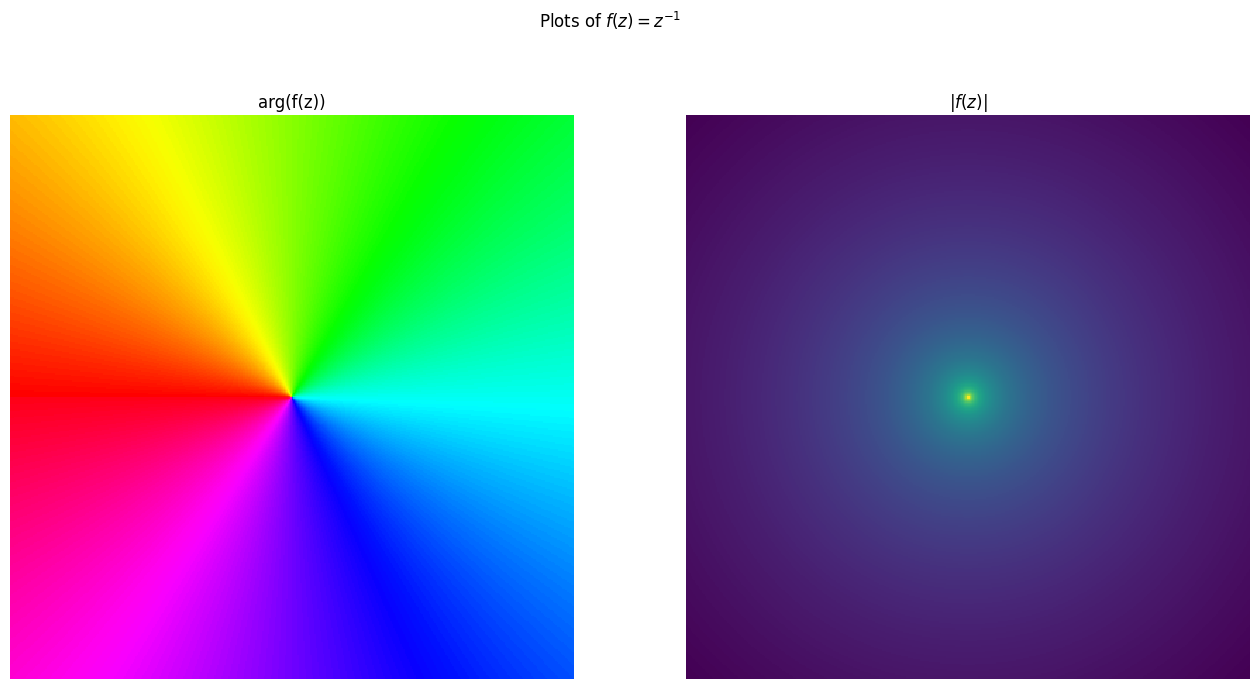

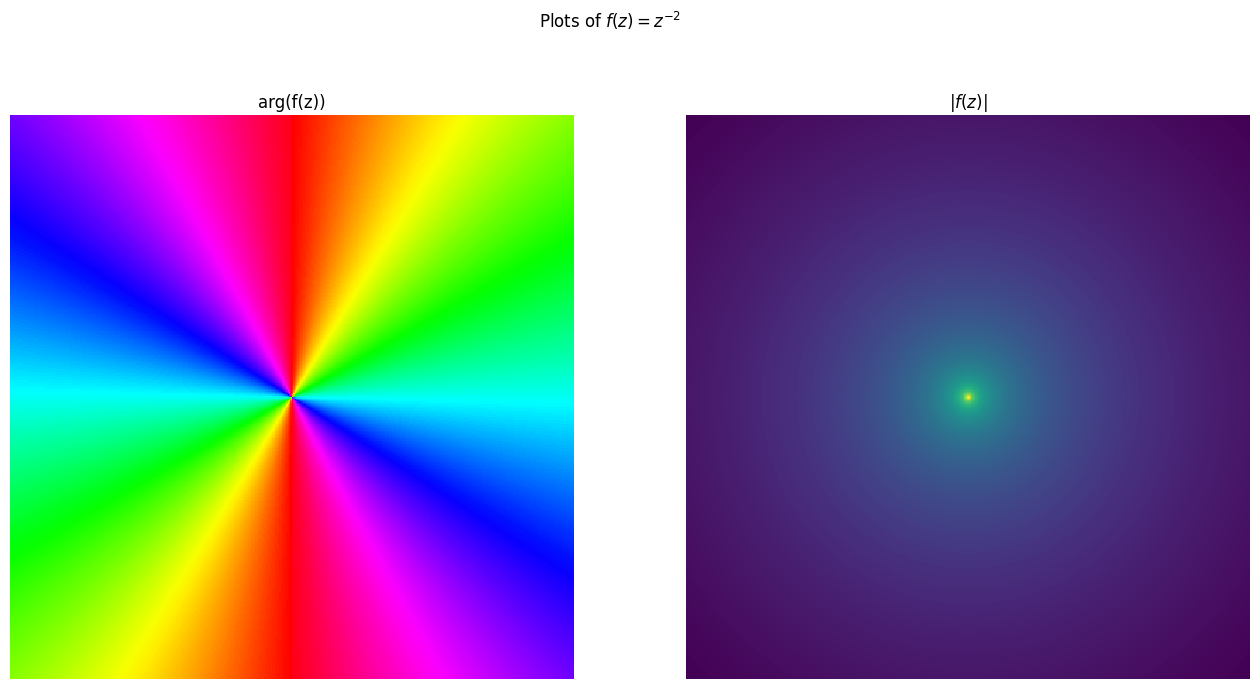

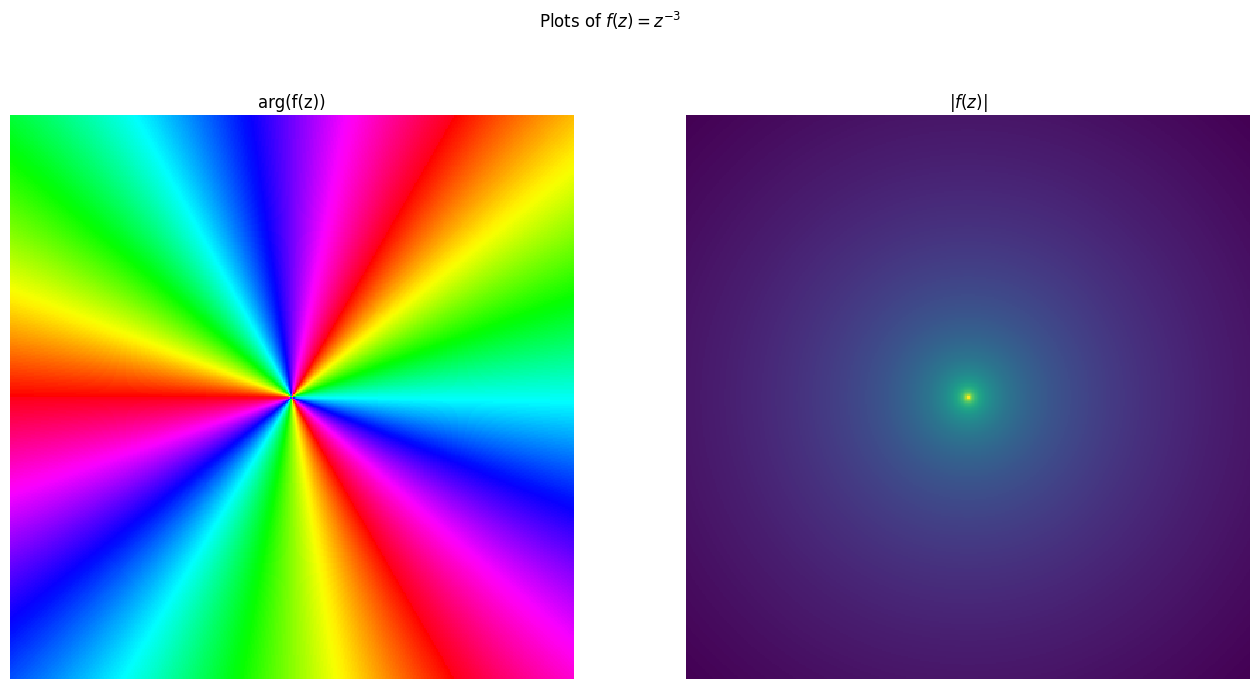

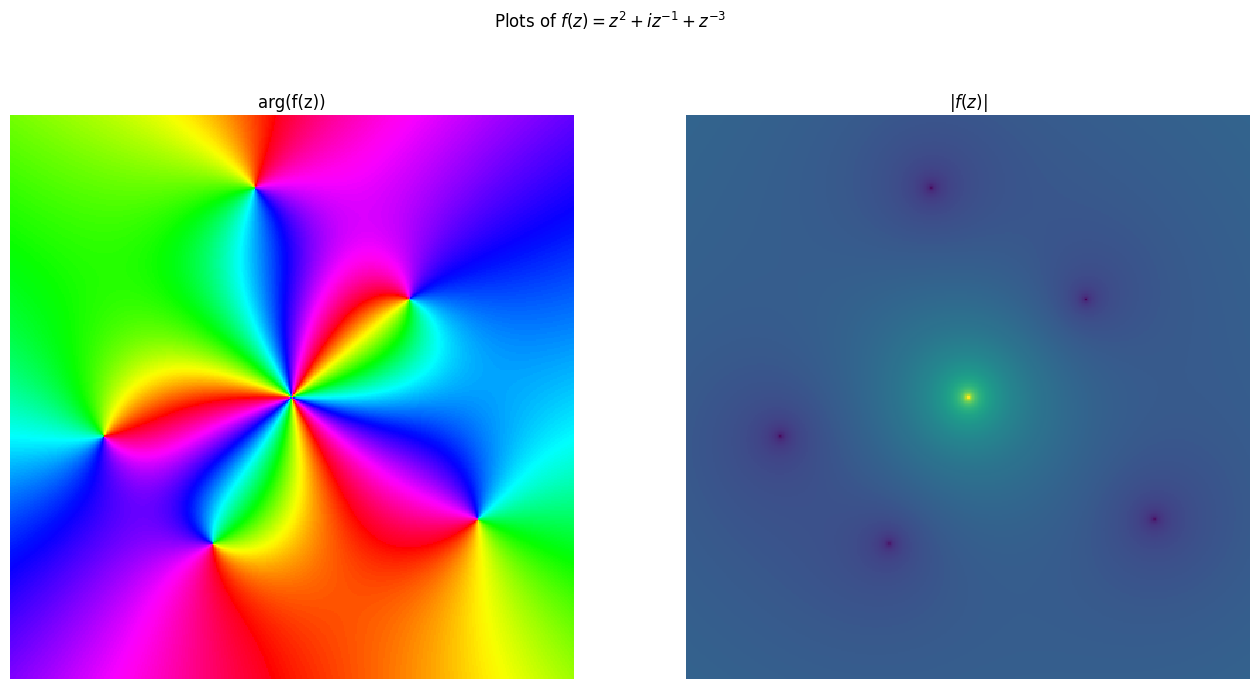

In [5]:
f = lambda z: 1/z
plot_complex(f, title=r"Plots of $f(z) = z^{-1}$")

f = lambda z: 1/z**2
plot_complex(f, title=r"Plots of $f(z) = z^{-2}$")

f = lambda z: 1/z**3
plot_complex(f, title=r"Plots of $f(z) = z^{-3}$")

f = lambda z: z**2 + 1j*(1/z) + 1/z**3
plot_complex(f, window=[-1.5,1.5,-1.5,1.5], title=r"Plots of $f(z) = z^2 + iz^{-1} + z^{-3}$")

You can tell where the poles are in a similar way to how you tell where the roots are.

On the angle plots, the colors around a pole change from blue to green clockwise around it, while the colors around roots change from blue to green counterclockwise.

On the magnitude plot, you can easily tell where the poles are since they show up as bright dots. They're bright because the function approaches infinity at those points.

Just like with a root, the multiplicity of a pole can be seen by the number of times the colors cycle around it.

Now let's do some crazy functions. We'll have to experiment with the plot window on these to discover all the roots and poles.

- $f(z) = -4z^5 + 2z^4 - 2z^3 - 4z^2 + 4z - 4$
- $f(z) = z^7 +6z^6 −131z^5 −419z^4 +4906z^3 −131z^2 −420z+4900$
- $f(z) = \frac{16z^4 + 32z^3 + 32z^2 + 16z + 4}{16z^4 - 16z^3 + 5z^2}$

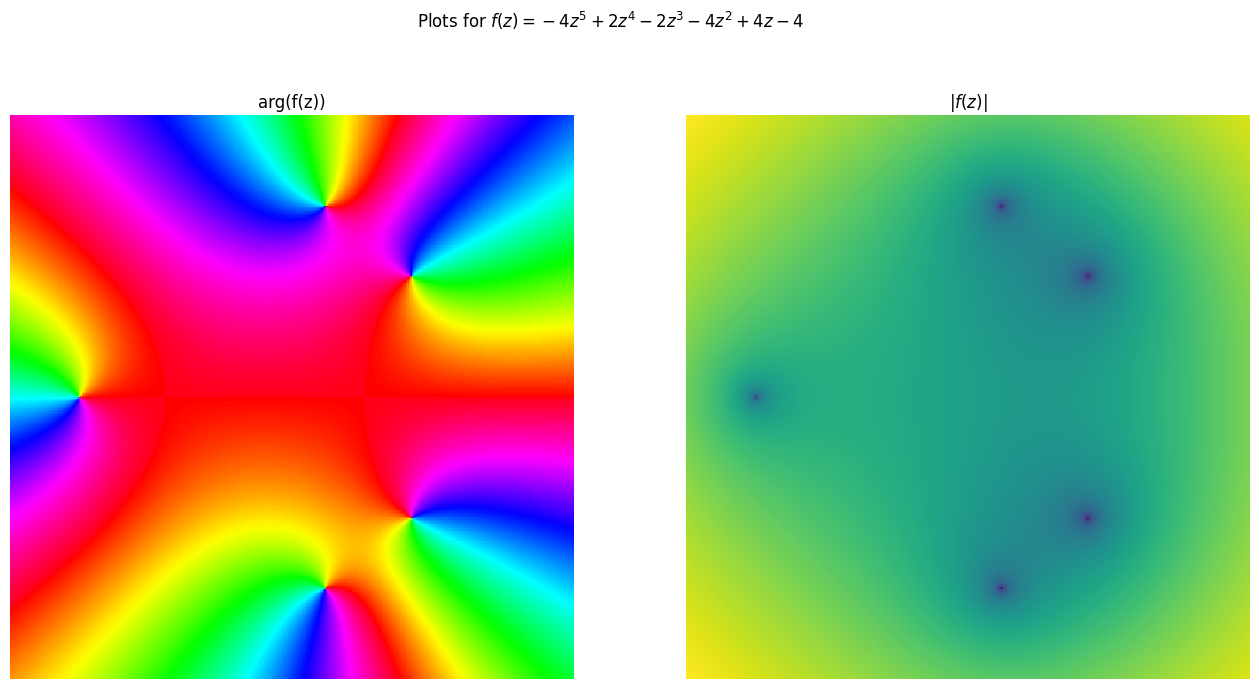

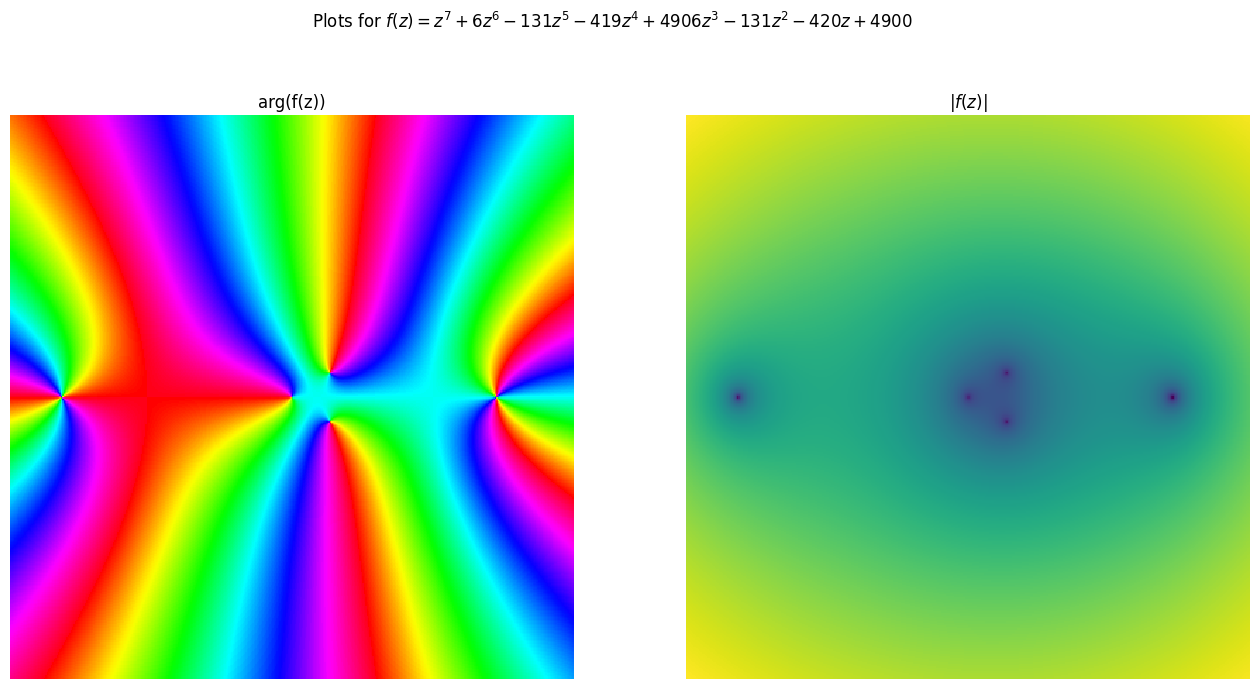

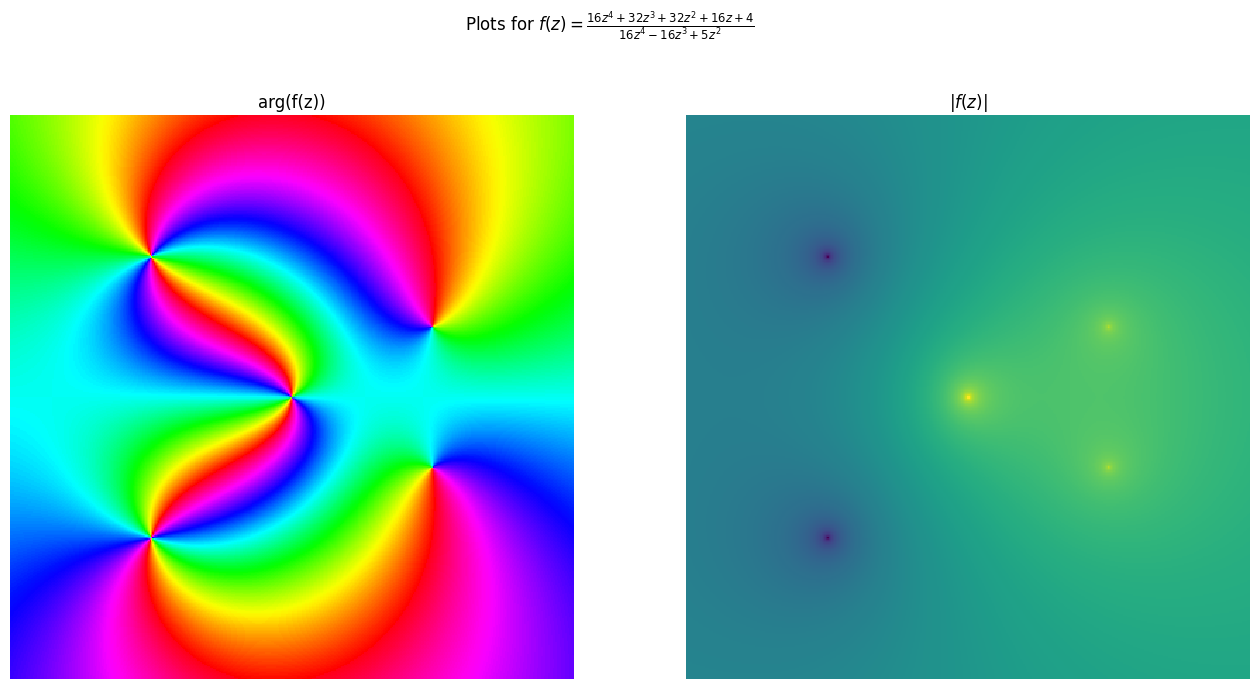

In [6]:
f = lambda z: -4*z**5 + 2*z**4 - 2*z**3 - 4*z**2 + 4*z - 4
plot_complex(f, window=[-1.5,1.5,-1.5,1.5], title=r"Plots for $f(z) = -4z^5 + 2z^4 - 2z^3 - 4z^2 + 4z - 4$")

f = lambda z: z**7 + 6*z**6 - 131*z**5 - 419*z**4 + 4906*z**3 - 131*z**2 - 420*z + 4900
plot_complex(f, window=[-12,10,-10,10], title=r" Plots for $f(z) = z^7 +6z^6 -131z^5 -419z^4 +4906z^3 -131z^2 -420z+4900$")

f = lambda z: (16*z**4 + 32*z**3 + 32*z**2 + 16*z + 4) / (16*z**4 - 16*z**3 + 5*z**2)
plot_complex(f, title=r"Plots for $f(z) = \frac{16z^4 + 32z^3 + 32z^2 + 16z + 4}{16z^4 - 16z^3 + 5z^2}$")

The first function has 5 roots and no poles. Each root has multiplicity 1.

The second function has 7 roots and no poles. There are 3 roots of multiplicity 1 and 2 roots of multiplicity 2.

The last function has 2 roots and 3 poles. Both roots are of multiplicity 2. Two of the poles have multiplicity 1 and the one at $0$ has multiplicity 2.

Now let's plot some non-polynomial functions on the domain $\{x+iy\mid x,y\in[-8,8]\}$.

- $f(z) = e^z$.
- $f(z) = \tan(z)$.

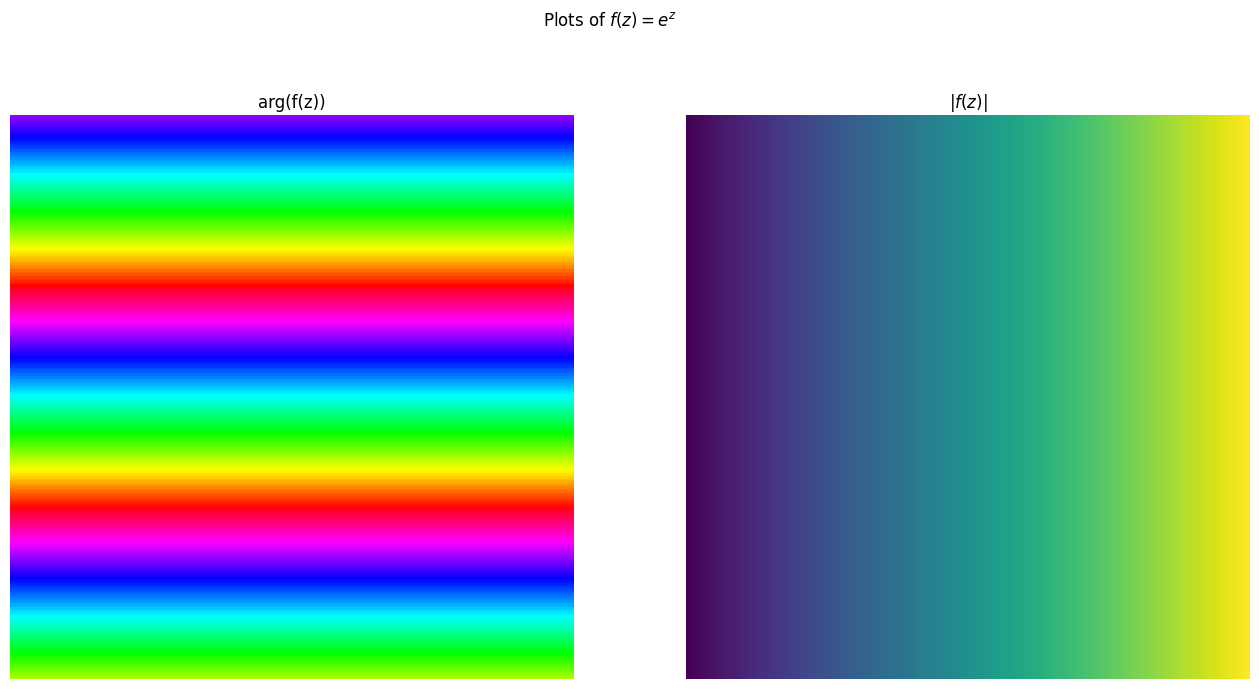

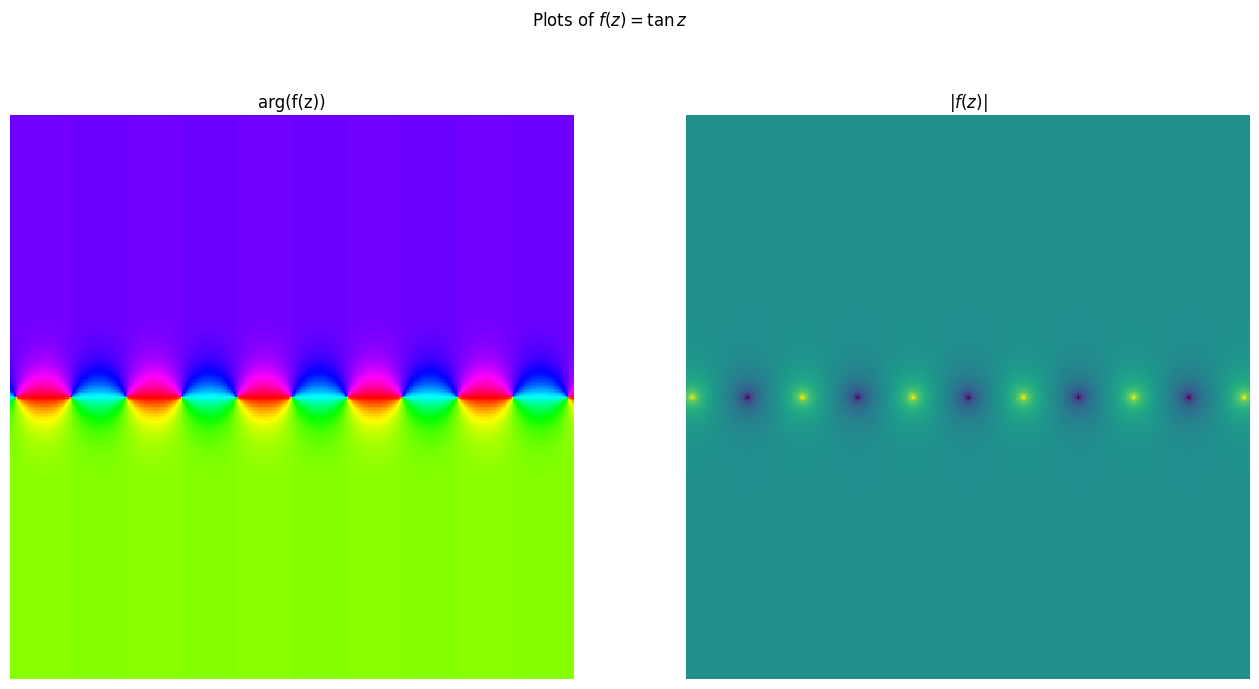

In [7]:
f = lambda z: np.exp(z)
plot_complex(f, window=[-8,8,-8,8], title=r"Plots of $f(z) = e^z$")

f = lambda z: np.tan(z)
plot_complex(f, window=[-8,8,-8,8],title=r"Plots of $f(z) = \tan{z}$")

Let's take a look at the first function, $f(z) = e^z$.

For a complex number $z = a + bi$, we have that $f(z) = e^z = e^{a+bi} = e^ae^{bi}$. Since any complex number can be written as $re^{i\theta}$ where $r$ is the magnitude and $\theta$ is the angle, we see that the magnitude of $f(z) = e^z$ is $e^a$, and therefore changes with the real part of $z$, $a$. The the angle of $e^z$ is $e^{bi}$ and therefore changes with the imaginary part of $z$, $b$. This explains why in the colors change along the imaginary (vertical) axis in the angle graph and why, in the magnitude graph, the color gets darker as as the real part gets more negative.

Now let's look at $f(z) = \tan{z}$.

The graph of $\tan{z}$ alternates between poles and roots along the real line. This is because $\tan{z}$ is zero when the imaginary part of $z$ is zero and the real part is a multiple of $\pi$, and $\tan{z}$ has asymptotes at multiples of $\pi/2$.

Finally, let's take a look at some functions that are a little deceptive.

- $f(z) = 100z^2 + z$
- $f(z) = \sin\left(\frac{1}{100z}\right)$.

First, let's plot the function on the domain $\{x+iy\mid x,y\in[-1,1]\}$.

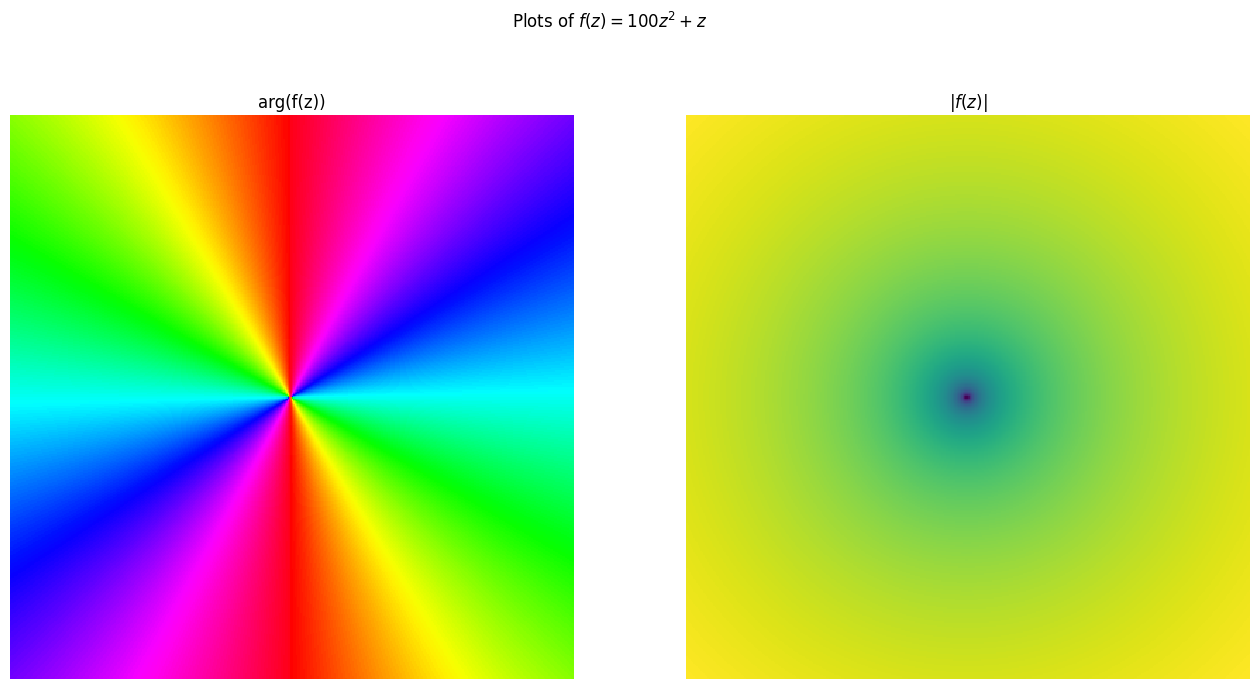

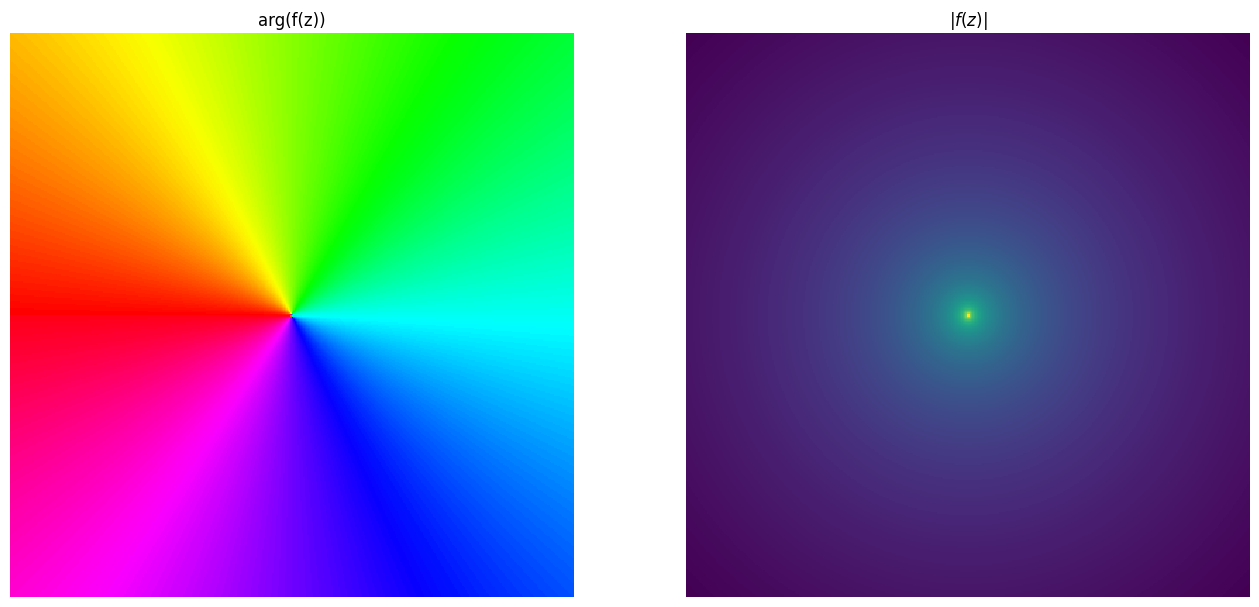

In [8]:
# Problem 6
f = lambda z: 100*z**2 + z
plot_complex(f, title=r"Plots of $f(z) = 100z^2 + z$")

f = lambda z: np.sin(1/(100*z))
plot_complex(f)

From the plots above, it seems like the first function has a single root of multiplicity 2 at the origin and like the second function has a single pole at the origin.

Now let's zoom way in on those singularities.

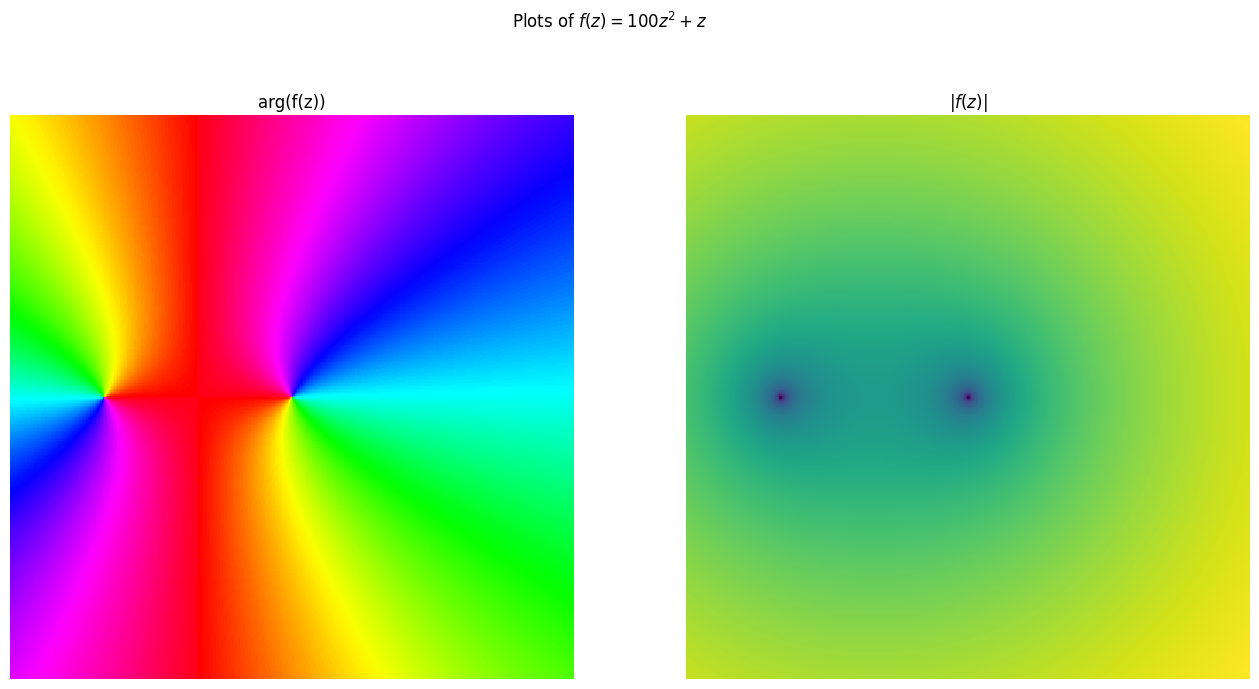

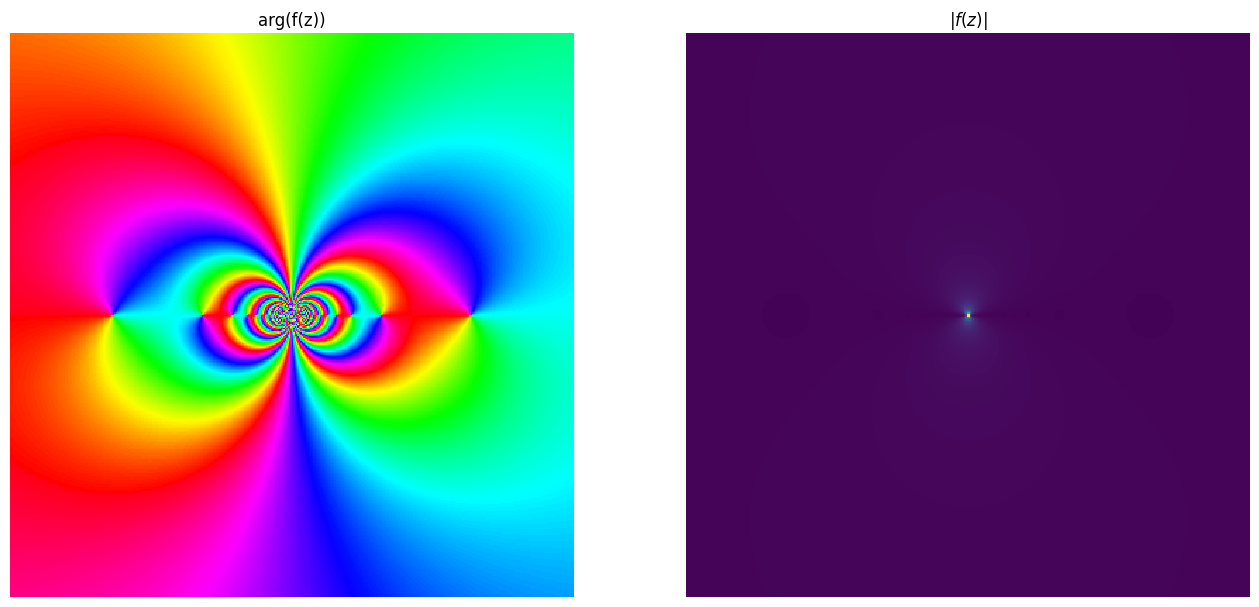

In [9]:
f = lambda z: 100*z**2 + z
plot_complex(f, window=[-.015, .015, -.015, .015], title=r"Plots of $f(z) = 100z^2 + z$")

f = lambda z: np.sin(1/(100*z))
plot_complex(f, window=[-.005, .005, -.005, .005])

That looks super different!

When zoomed in, you can see that there are actually two roots in the first function which are just very close to each other.

In the second function, the singularity exhibits some strange behavior. We call singularities of this type _essential_ singularities. This is as opposed to _removable_ singularities, which are what the rest of the poles and roots in this notebook are.